# Импортируем необходимые библиотеки

In [6]:
!pip install rdkit

In [7]:
import tensorflow as tf
from tensorflow import keras
import rdkit
import torch

# Проверяем версии для уверенности в правильности установки
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("RDKit version:", rdkit.__version__)
print("PyTotch version:", torch.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0
RDKit version: 2024.03.6
PyTotch version: 2.5.1+cu121


In [8]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [9]:
#импортируем методы RDKit
import warnings

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator, rdMolDescriptors
from rdkit import DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

# Импортируем данные

,Unnamed: 0,Name,Smiles,Ka_mean,mol
0,0,cyclododecylammonium,[NH3+]C1CCCCCCCCCCC1,52000.0,
1,1,"4-(1,1-dimethylpiperidin-1-ium-4-yl)-1,1-dimet...",C[N+]1(C)CCC(CC1)C1CC[N+](C)(C)CC1,45000000.0,
2,2,norbornan-2-ylammonium,[NH3+]C1CC2CCC1C2,640000.0,
3,3,trimethylsilylmethylammonium,C[Si](C)(C)C[NH3+],500000.0,
4,4,"[3,5-dimethyl-7-(trimethylammonio)-1-adamantyl...",CC12CC3(C)CC(C1)(CC(C2)(C3)[N+](C)(C)C)[N+](C)...,9200.0,
5,5,cyclooctylammonium,[NH3+]C1CCCCCCC1,720000.0,
6,6,cyclohexylammonium,[NH3+]C1CCCCC1,130000.0,
7,7,3-[benzyl(dimethyl)ammonio]propane-1-sulfonate,C[N+](C)(CCCS([O-])(=O)=O)CC1=CC=CC=C1,23300.0,
8,8,(3-hydroxy-1-adamantyl)ammonium,[NH3+]C12CC3CC(C1)CC(O)(C3)C2,37000.0,
9,9,trimethyl-[[4-[(trimethylammonio)methyl]phenyl...,C[N+](C)(C)CC1=CC=C(C[N+](C)(C)C)C=C1,16000000.0,

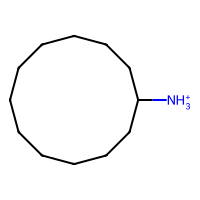
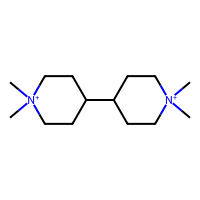
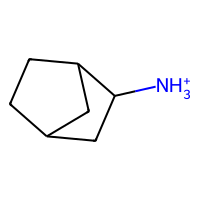
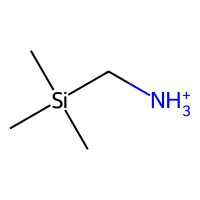
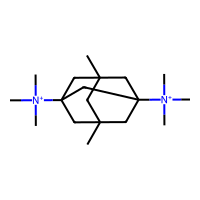
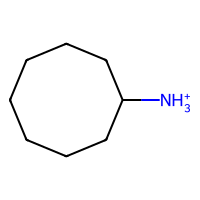
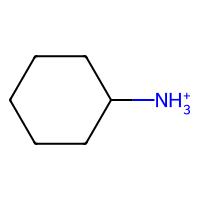
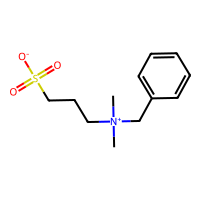
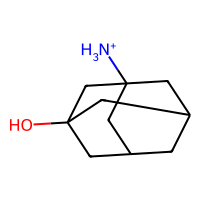
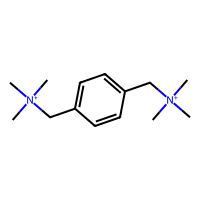
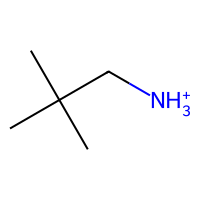
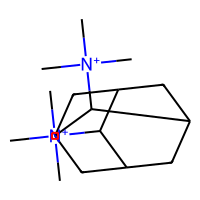
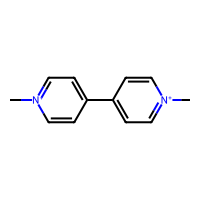
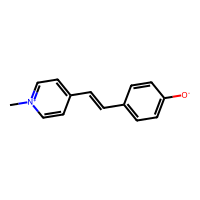
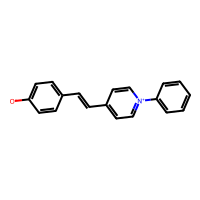
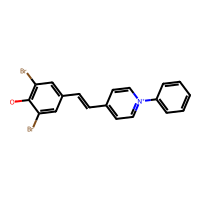
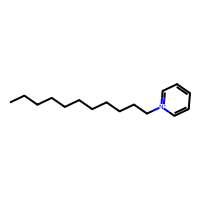
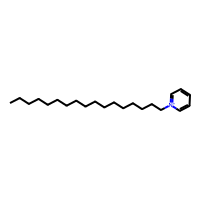
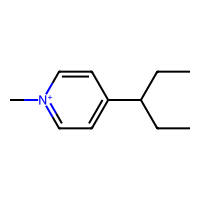
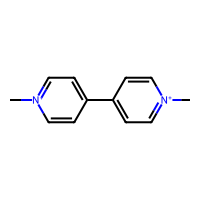
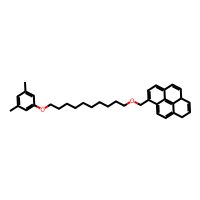

In [10]:
FULL_df = pd.read_csv("GuestsWP6.csv")
FULL_df = FULL_df.drop(["mol"], axis = 1)
PandasTools.AddMoleculeColumnToFrame(FULL_df, 'Smiles', 'mol')
FULL_df

# Дескрипторы

### Создание

In [11]:
from rdkit.Chem import Descriptors
prop = [Descriptors.CalcMolDescriptors(mol) for mol in FULL_df["mol"]]
df_prop = pd.DataFrame(prop)
df = pd.concat([FULL_df, df_prop], axis = 1).drop(["Name", "mol", "Smiles", "Unnamed: 0"], axis = 1)
df.sample(3)

,Ka_mean,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
5,720000.0,4.099167,4.099167,0.768796,0.768796,0.509677,25.000,128.239,110.095,128.143376,...,0,0,0,0,0,0,0,0,0,0
8,37000.0,10.227708,10.227708,0.262731,-0.299769,0.537166,62.500,168.260,150.116,168.138291,...,0,0,0,0,0,0,0,0,0,0
2,640000.0,4.120185,4.120185,0.827546,0.827546,0.470059,52.875,112.196,98.084,112.112076,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#количество дескрипторов
len(list(df.columns)) - 1

210

### Анализ кореллирующих дескрипторов (основного датасета)

In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [14]:
from catboost import CatBoostRegressor

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(["Ka_mean"], axis = 1)
Y = df["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, verbose=0)

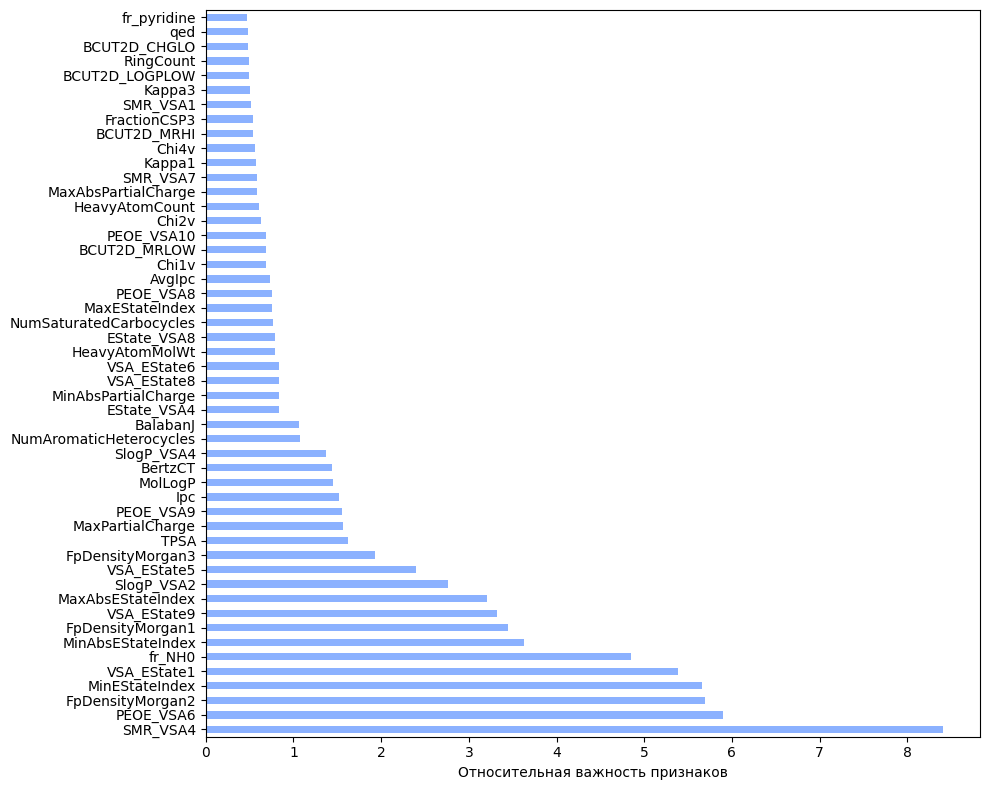

In [18]:
y_pred = cb.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_importances = pd.Series(cb.get_feature_importance(), index=X.columns)
feat_importances.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность признаков')
plt.tight_layout()

In [19]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances
})

# Сортируем DataFrame по важности и берем топ-10 признаков
top_features_desc = importance_df.sort_values(by='Importance', ascending=False).head(10)

### Топ-10 важных дескрипторов

In [20]:
top_features_desc

,Feature,Importance
SMR_VSA4,SMR_VSA4,8.408524
PEOE_VSA6,PEOE_VSA6,5.898335
FpDensityMorgan2,FpDensityMorgan2,5.692163
MinEStateIndex,MinEStateIndex,5.654230
VSA_EState1,VSA_EState1,5.388300
fr_NH0,fr_NH0,4.854798
MinAbsEStateIndex,MinAbsEStateIndex,3.632347
FpDensityMorgan1,FpDensityMorgan1,3.452098
VSA_EState9,VSA_EState9,3.326462
MaxAbsEStateIndex,MaxAbsEStateIndex,3.212046


In [21]:
top_desc = list(top_features_desc["Feature"])

In [22]:
#создадим датасет только с актуальными дескрипторами
DF = df[top_desc]
DF = DF.assign(Ka_mean = df["Ka_mean"])

### Нормализация

In [23]:
DF.sample(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
17,0.000000,96.460785,0.869565,1.179659,2.293903,1,1.179659,0.478261,0.0,2.293903,326000.0
8,11.835812,0.000000,1.666667,-0.299769,0.000000,0,0.262731,1.083333,0.0,10.227708,37000.0
10,5.414990,20.771212,1.500000,0.430556,0.000000,0,0.430556,1.333333,0.0,3.756944,33000.0


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
cols_for_nor = list(DF.columns)

#создаю трансформатор для нормализации Y
ct = make_column_transformer((MinMaxScaler(), cols_for_nor))

np.random.seed(42)

#трансформирую
ct.fit(DF[cols_for_nor])
norm = ct.transform(DF[cols_for_nor])
DF_norm = pd.DataFrame(norm, columns = cols_for_nor)
#DF_norm = DF_norm.drop(['Unnamed: 0'], axis = 1)

In [25]:
DF_norm.sample(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
17,0.0,1.000000,0.115312,0.986167,0.071198,0.5,0.939391,0.000000,0.048112,0.018216,0.003106
15,0.0,0.704541,0.489603,0.758148,0.098704,0.5,0.000000,0.355932,0.048112,1.000000,0.000939


# Фингерпринты (также только для WP6)

## MorganFingerprints

### Создание

In [26]:
df_mf = []

for mol in FULL_df['mol']:
  gen_morgan = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 2048)
  fp_morgan = gen_morgan.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(fp_morgan, arr)
  df_mf.append(arr)

MF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_mf)], axis = 1)
MF.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000420,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Анализ

In [27]:
cb_morgan = CatBoostRegressor()
X = MF.drop(["Ka_mean"], axis = 1)[:]
y = MF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_morgan.fit(X_train, y_train, verbose=0)

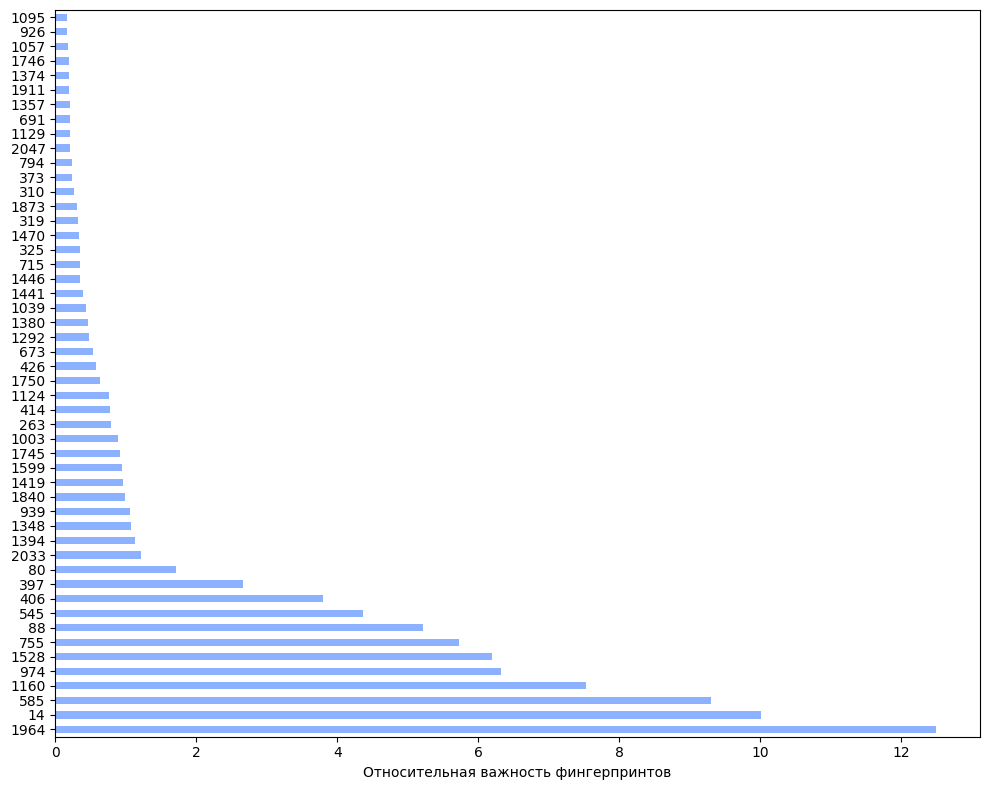

In [28]:
y_pred = cb_morgan.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_morgan = pd.Series(cb_morgan.get_feature_importance(), index=X.columns)
feat_imp_morgan.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [29]:
importance_df_morgan = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_morgan
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_morgan = importance_df_morgan.sort_values(by='Importance', ascending=False).head(15)
top_features_morgan

,Feature,Importance
1964,1964,12.488959
14,14,10.011446
585,585,9.298234
1160,1160,7.521787
974,974,6.320426
1528,1528,6.190821
755,755,5.719389
88,88,5.218309
545,545,4.359810
406,406,3.792956


In [30]:
top_morgan = list(top_features_morgan["Feature"])

### Удаление часто повторяющихся признаков

In [31]:
Morgan_data = pd.concat([MF[top_morgan], DF_norm], axis = 1)

In [32]:
Morgan_data.head(3)

,1964,14,585,1160,974,1528,755,88,545,406,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0,1,0,0,0,0,0,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,1,0,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [33]:
for col in Morgan_data.columns:
       print(f'Уникальные значения для {col}:\n{Morgan_data[col].value_counts()}\n')

Уникальные значения для 1964:
1964
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 14:
14
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 585:
585
0    18
1     3
Name: count, dtype: int64

Уникальные значения для 1160:
1160
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 974:
974
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 1528:
1528
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 755:
755
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 88:
88
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 545:
545
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 406:
406
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 397:
397
0    14
1     7
Name: count, dtype: int64

Уникальные значения для 80:
80
0    13
1     8
Name: count, dtype: int64

Уникальные значения для 2033:
2033
0    18
1     3
Name: count, dtype: int64

Уникальные

Таким образом, почти все фингерпринты повторяются, соответственно, стоит убрать из датасета все фингерпринты кроме 397 и 80

In [34]:
def analyze_repetition(dataframe):
    # Список для хранения названий столбцов с высоким процентом повторяющихся значений
    high_repetition_columns = []

    # Проходим по всем столбцам DataFrame
    for col in dataframe.columns:
        # Получение количества повторений значений
        value_counts = dataframe[col].value_counts(normalize=True)

        # Высчитываем максимальный процент повторяющегося значения
        max_percentage = value_counts.max() * 100  # Преобразуем в проценты

        # Если процент превышает 80, добавляем в список
        if max_percentage > 80:
            high_repetition_columns.append(col)

    return high_repetition_columns

In [35]:
analyze_repetition(Morgan_data)

[1964, 14, 585, 1160, 974, 1528, 755, 88, 545, 406, 2033, 1394, 1348]

### **Готовый датасет**



> Состоит из констант связывания, дескрипторов и фингерпринтов




In [64]:
MORGAN_data = Morgan_data.drop(analyze_repetition(Morgan_data), axis = 1)
MORGAN_data.head(3)

,397,80,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,1,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,1,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## Avalon Fingerprints

Повторим все то же самое, только для авалоновских и других фингерпринтов

### Создание

In [37]:
df_avalon = []

for mol in FULL_df['mol']:
  gen_avalon = pyAvalonTools.GetAvalonFP(mol, nBits = 2048)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(gen_avalon, arr)
  df_avalon.append(arr)

AVALON = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_avalon)], axis = 1)
AVALON.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441126,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

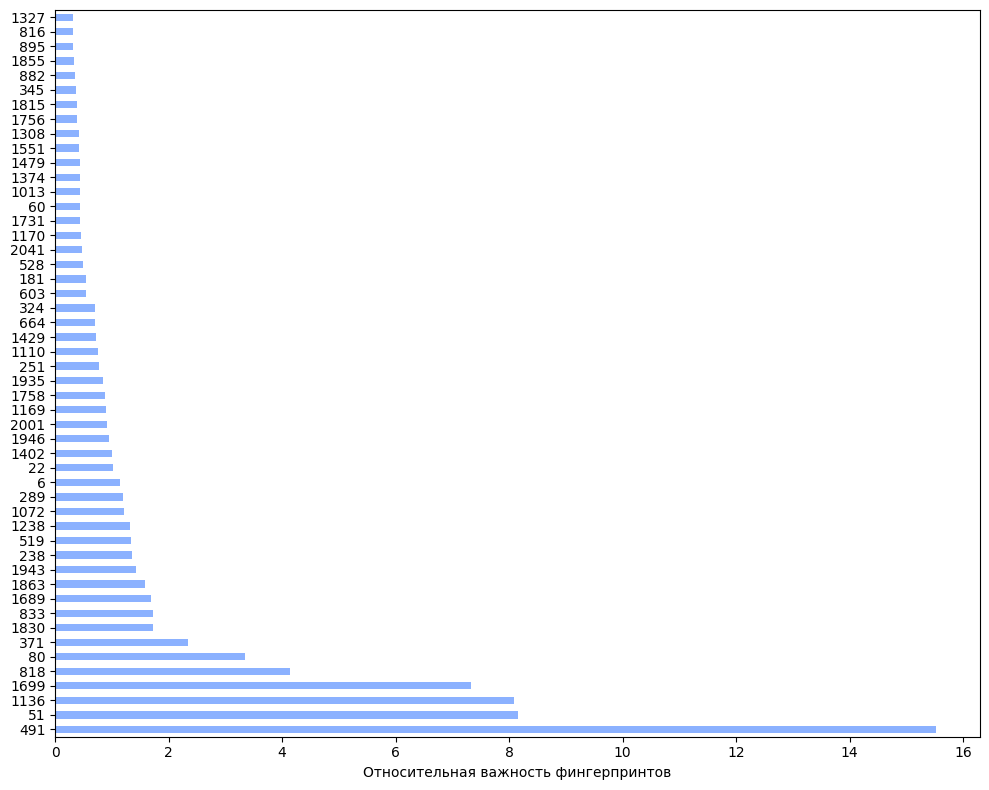

In [38]:
cb_av = CatBoostRegressor()
X = AVALON.drop(["Ka_mean"], axis = 1)[:]
y = AVALON["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_av.fit(X_train, y_train, verbose=0)

y_pred = cb_av.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_avalon = pd.Series(cb_av.get_feature_importance(), index=X.columns)
feat_imp_avalon.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

In [39]:
importance_df_avalon = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_avalon
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_avalon = importance_df_avalon.sort_values(by='Importance', ascending=False).head(15)
top_avalon = list(top_features_avalon["Feature"])
top_features_avalon

,Feature,Importance
491,491,15.522696
51,51,8.149253
1136,1136,8.078771
1699,1699,7.321528
818,818,4.139235
80,80,3.338720
371,371,2.341670
1830,1830,1.730886
833,833,1.722094
1689,1689,1.690142


### Удаление часто повторяющихся признаков

In [40]:
Avalon_data = pd.concat([MF[top_avalon], DF_norm], axis = 1)
Avalon_data.head(3)

,491,51,1136,1699,818,80,371,1830,833,1689,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [41]:
for col in Avalon_data.columns:
       print(f'Уникальные значения для {col}:\n{Avalon_data[col].value_counts()}\n')

Уникальные значения для 491:
491
0    21
Name: count, dtype: int64

Уникальные значения для 51:
51
0    21
Name: count, dtype: int64

Уникальные значения для 1136:
1136
0    21
Name: count, dtype: int64

Уникальные значения для 1699:
1699
0    21
Name: count, dtype: int64

Уникальные значения для 818:
818
0    21
Name: count, dtype: int64

Уникальные значения для 80:
80
0    13
1     8
Name: count, dtype: int64

Уникальные значения для 371:
371
0    21
Name: count, dtype: int64

Уникальные значения для 1830:
1830
0    21
Name: count, dtype: int64

Уникальные значения для 833:
833
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 1689:
1689
0    21
Name: count, dtype: int64

Уникальные значения для 1863:
1863
0    21
Name: count, dtype: int64

Уникальные значения для 1943:
1943
0    21
Name: count, dtype: int64

Уникальные значения для 238:
238
0    21
Name: count, dtype: int64

Уникальные значения для 519:
519
0    21
Name: count, dtype: int64

Уникальные значения для 

In [42]:
analyze_repetition(Avalon_data)

[491, 51, 1136, 1699, 818, 371, 1830, 833, 1689, 1863, 1943, 238, 519, 1238]

### **Готовый датасет**

In [65]:
AVALON_data = Avalon_data.drop(analyze_repetition(Avalon_data), axis = 1)
AVALON_data.head(3)

,80,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## PatternFingerprints

### Создание

In [44]:
df_pf = []

for mol in FULL_df['mol']:
  pf = Chem.rdmolops.PatternFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(pf, arr)
  df_pf.append(arr)

PF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
PF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
20,0.000698,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13,0.001126,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000273,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Анализ

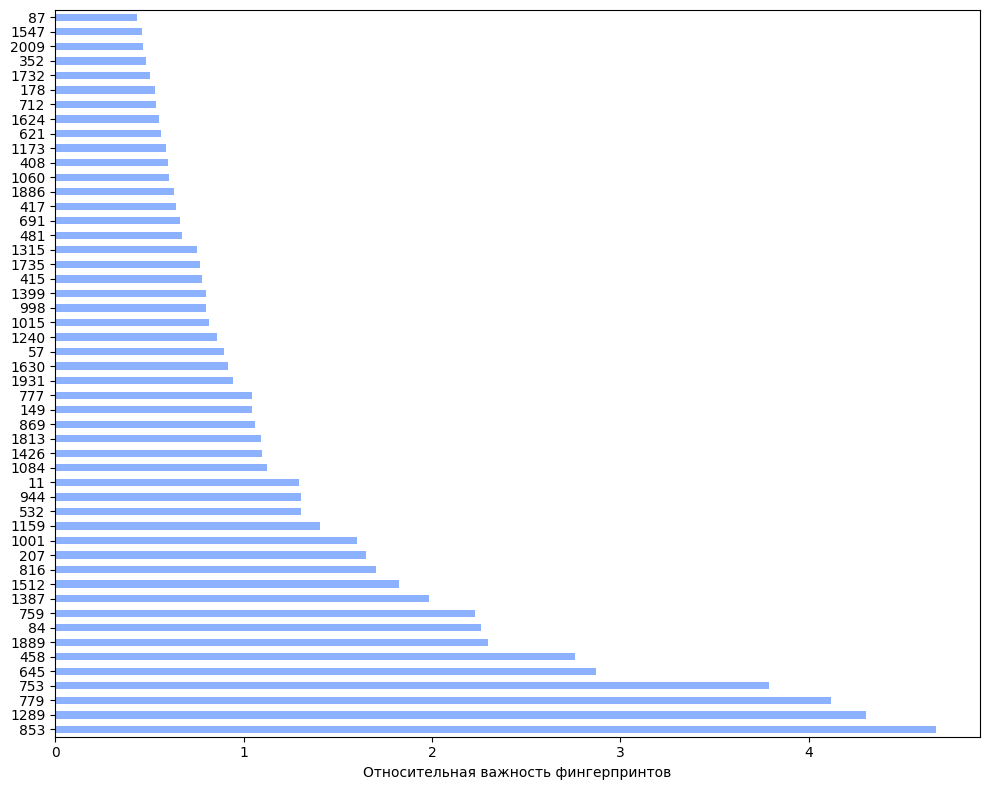

In [45]:
cb_pf = CatBoostRegressor()
X = PF.drop(["Ka_mean"], axis = 1)[:]
y = PF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_pf.fit(X_train, y_train, verbose=0)

y_pred = cb_pf.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_PF = pd.Series(cb_pf.get_feature_importance(), index=X.columns)
feat_imp_PF.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

Полагаю, что даже смысла нет работать с этими фингерпринтами дальше. Они слабо коррелируют с нашим таргетом

## MACCS

### Создание

In [46]:
df_maccs = []

for mol in FULL_df['mol']:
  maccs = MACCSkeys.GenMACCSKeys(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(maccs, arr)
  df_maccs.append(arr)

MACCS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
MACCS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
16,0.001126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.006969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0.000233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Анализ

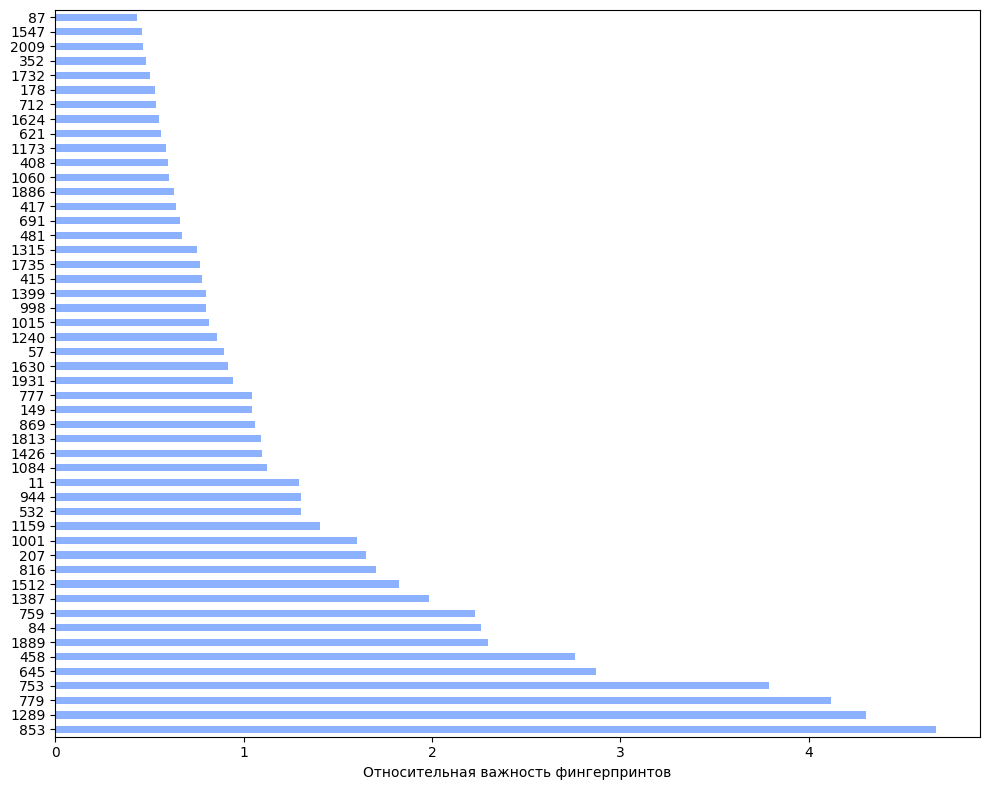

In [47]:
cb_mc = CatBoostRegressor()
X = MACCS.drop(["Ka_mean"], axis = 1)[:]
y = MACCS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_mc.fit(X_train, y_train, verbose=0)

y_pred = cb_mc.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_maccs = pd.Series(cb_mc.get_feature_importance(), index=X.columns)
feat_imp_maccs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

MACCS также слабо коррелирует с поставленной задачей

## AtomPairs Fingerprints

### Создание

In [48]:
#создадим пустой массив
df_atom = []

apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
for mol in FULL_df['mol']:
  atomgen = apgen.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(atomgen, arr)
  df_atom.append(arr)

ATOMPAIRS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_atom)], axis = 1)
ATOMPAIRS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
4,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.000233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

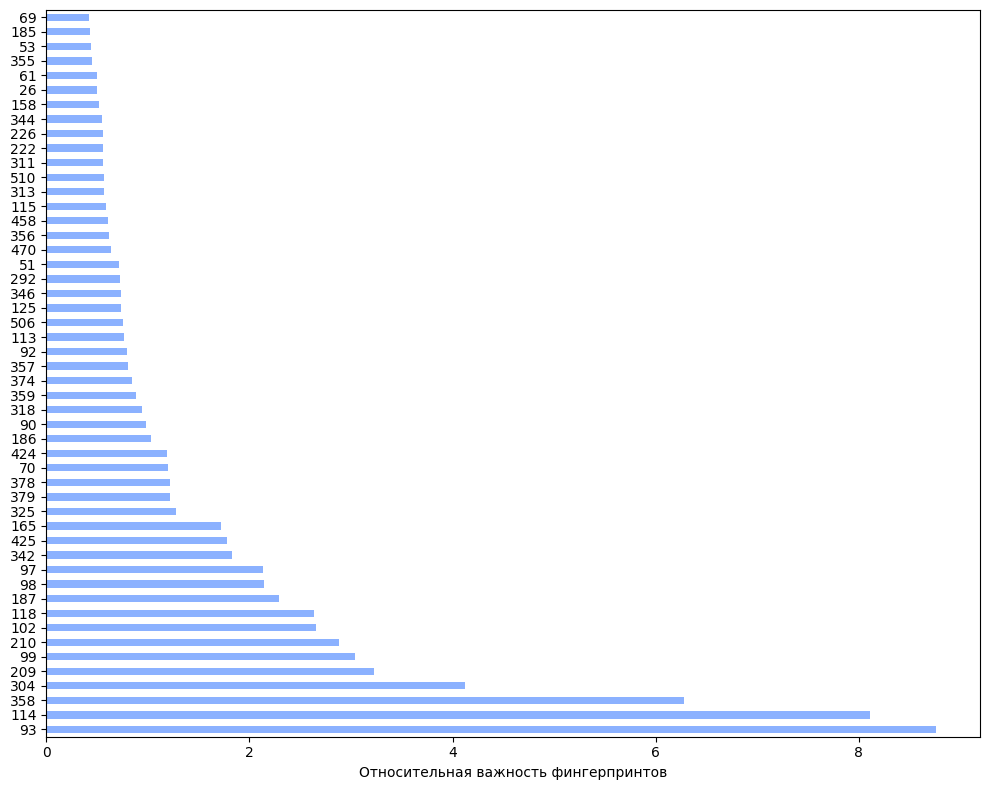

In [49]:
cb_atom = CatBoostRegressor()
X = ATOMPAIRS.drop(["Ka_mean"], axis = 1)[:]
y = ATOMPAIRS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_atom.fit(X_train, y_train, verbose=0)

y_pred = cb_atom.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_atompairs = pd.Series(cb_atom.get_feature_importance(), index=X.columns)
feat_imp_atompairs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

Вот это уже будет получше: можно работать

In [50]:
importance_df_atompairs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_atompairs
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_atompairs = importance_df_atompairs.sort_values(by='Importance', ascending=False).head(15)
top_atompairs = list(top_features_atompairs["Feature"])
top_features_atompairs

,Feature,Importance
93,93,8.755753
114,114,8.114272
358,358,6.280302
304,304,4.123778
209,209,3.226862
99,99,3.039471
210,210,2.883112
102,102,2.650751
118,118,2.633144
187,187,2.294384


### Удаление часто повторяющихся признаков

In [51]:
AtomPairs_data = pd.concat([ATOMPAIRS[top_atompairs], DF_norm], axis = 1)
AtomPairs_data.head(3)

,93,114,358,304,209,99,210,102,118,187,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,1,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,1,1,0,0,0,1,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,1,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [52]:
for col in AtomPairs_data.columns:
       print(f'Уникальные значения для {col}:\n{AtomPairs_data[col].value_counts()}\n')

Уникальные значения для 93:
93
0    18
1     3
Name: count, dtype: int64

Уникальные значения для 114:
114
0    17
1     4
Name: count, dtype: int64

Уникальные значения для 358:
358
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 304:
304
1    16
0     5
Name: count, dtype: int64

Уникальные значения для 209:
209
0    16
1     5
Name: count, dtype: int64

Уникальные значения для 99:
99
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 210:
210
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 102:
102
0    17
1     4
Name: count, dtype: int64

Уникальные значения для 118:
118
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 187:
187
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 98:
98
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 97:
97
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 342:
342
0    19
1     2
Name: count, dtype: int64

Уникальные значения 

In [53]:
analyze_repetition(Avalon_data)

[491, 51, 1136, 1699, 818, 371, 1830, 833, 1689, 1863, 1943, 238, 519, 1238]

### **Готовый датасет**

In [66]:
ATOM_data = AtomPairs_data.drop(analyze_repetition(AtomPairs_data), axis = 1)
ATOM_data.head(3)

,304,209,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,1,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,1,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## TopologicalTorsionGenerator

### Создание

In [55]:
df_ttf = []

ttfgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=512)
for mol in FULL_df['mol']:
  ttf = ttfgen.GetFingerprint(mol)
  arr = np.array(ttf)
  df_ttf.append(arr)

TTF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_ttf)], axis = 1)
TTF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
1,0.441126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.006969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Анализ

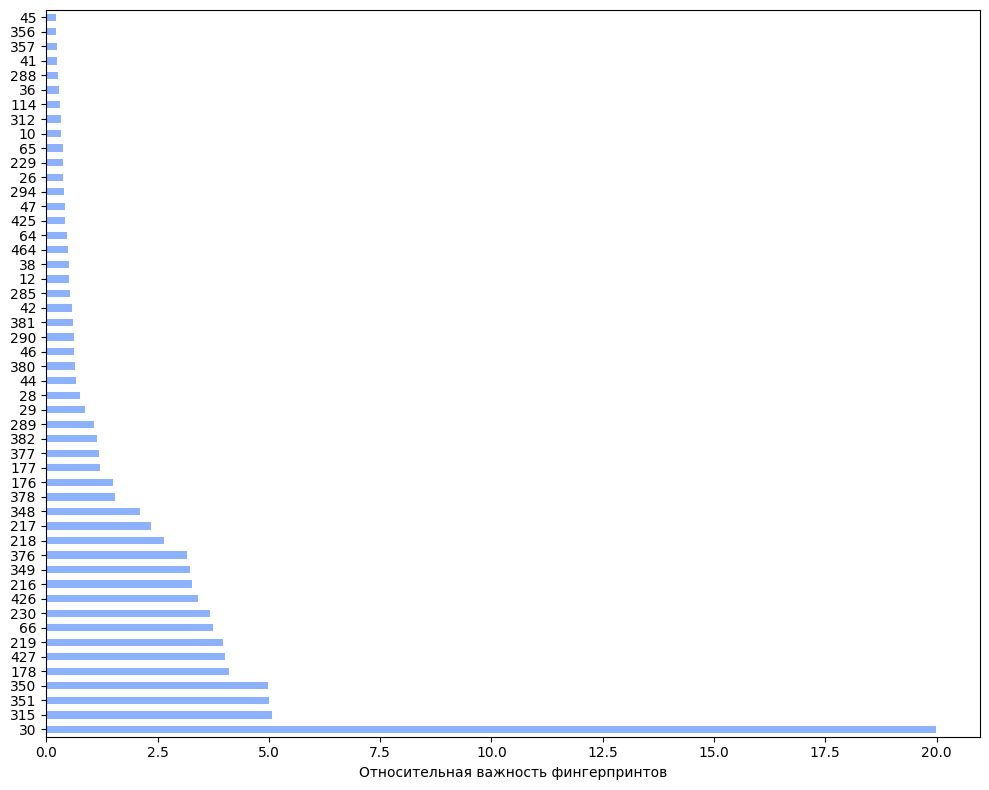

In [56]:
cb_ttf = CatBoostRegressor()
X = TTF.drop(["Ka_mean"], axis = 1)[:]
y = TTF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_ttf.fit(X_train, y_train, verbose=0)

y_pred = cb_ttf.predict(X_test)

# Важность признаков
fig = plt.figure(figsize=(10,8))
feat_imp_ttf = pd.Series(cb_ttf.get_feature_importance(), index=X.columns)
feat_imp_ttf.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Относительная важность фингерпринтов')
plt.tight_layout()

❗Стоит ли такое использовать? Один признак явно выделяется среди всех остальных

In [57]:
importance_df_ttf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_ttf
})

# Сортируем DataFrame по важности и берем топ-15 признаков
top_features_ttf = importance_df_ttf.sort_values(by='Importance', ascending=False).head(15)
top_ttf = list(top_features_ttf["Feature"])
top_features_ttf

,Feature,Importance
30,30,19.976682
315,315,5.080676
351,351,5.002980
350,350,4.978283
178,178,4.112256
427,427,4.007953
219,219,3.974548
66,66,3.748118
230,230,3.673137
426,426,3.416914


### Удаление часто повторяющихся признаков

In [58]:
TopTors_data = pd.concat([TTF[top_ttf], DF_norm], axis = 1)
TopTors_data.head(3)

,30,315,351,350,178,427,219,66,230,426,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [59]:
for col in TopTors_data.columns:
       print(f'Уникальные значения для {col}:\n{TopTors_data[col].value_counts()}\n')

Уникальные значения для 30:
30
0    18
1     3
Name: count, dtype: int64

Уникальные значения для 315:
315
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 351:
351
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 350:
350
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 178:
178
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 427:
427
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 219:
219
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 66:
66
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 230:
230
0    19
1     2
Name: count, dtype: int64

Уникальные значения для 426:
426
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 216:
216
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 349:
349
0    20
1     1
Name: count, dtype: int64

Уникальные значения для 376:
376
0    18
1     3
Name: count, dtype: int64

Уникальные значе

In [60]:
analyze_repetition(TopTors_data)

[30, 315, 351, 350, 178, 427, 219, 66, 230, 426, 216, 349, 376, 218, 217]

### **Готовый датасет**

In [67]:
TTF_data = TopTors_data.drop(analyze_repetition(TopTors_data), axis = 1)
TTF_data.head(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


# Корреляционные матрицы для всех датасетов

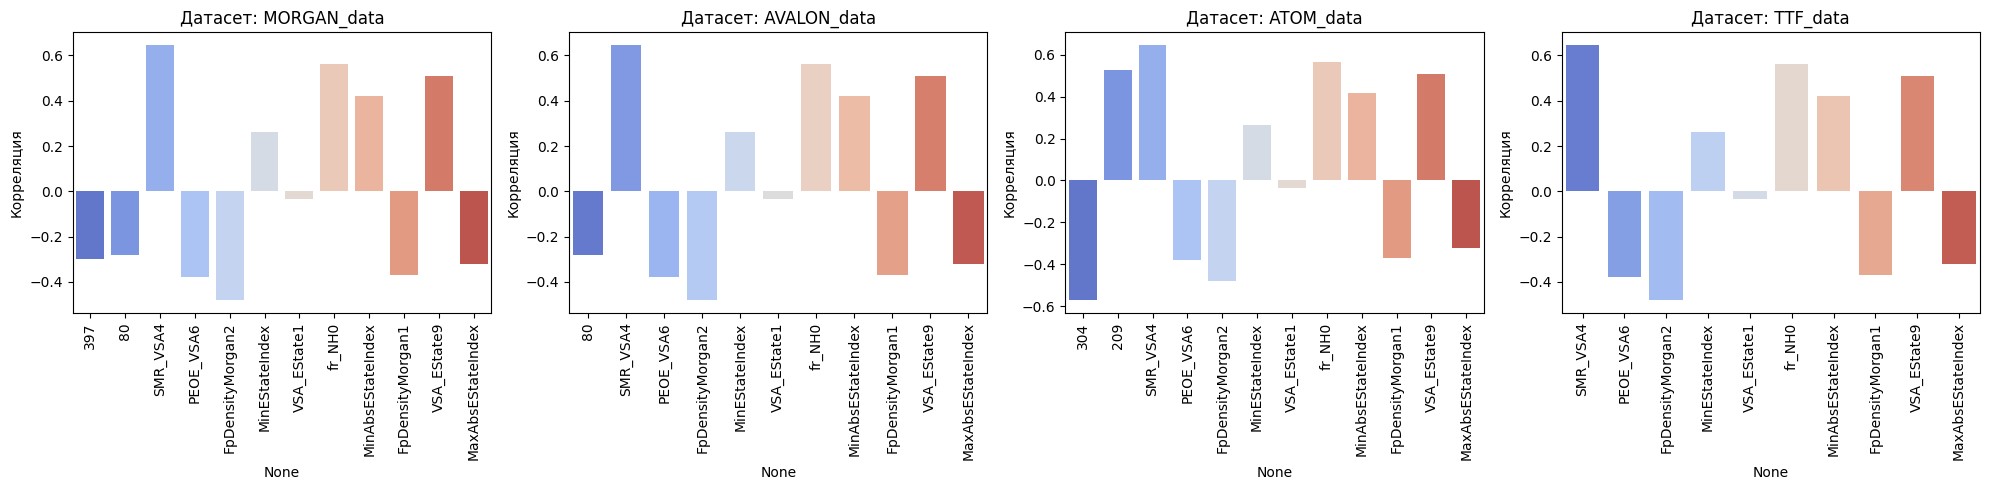

In [62]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('AVALON_data', AVALON_data),
    ('ATOM_data', ATOM_data),
    ('TTF_data', TTF_data)
]

target_column = 'Ka_mean'

plt.figure(figsize=(20, 5))  # Устанавливаем размер фигуры (ширина, высота)

for i, (name, df) in enumerate(datasets):
    if target_column not in df.columns:
        print(f"Целевой столбец '{target_column}' отсутствует в {name}.")
        continue  # Пропустить этот датасет, если целевой столбец отсутствует

    # Вычисляем корреляцию
    correlation_matrix = df.corr()

    # Проверяем, есть ли целевой столбец в корреляционной матрице
    if target_column not in correlation_matrix.columns:
        print(f"Столбец '{target_column}' отсутствует в корреляции для {name}.")
        continue

    # Получаем корреляции с целевой переменной
    target_correlation = correlation_matrix[target_column]

    # Строим barplot только для признаков, отличных от целевого
    features = target_correlation.index[target_correlation.index != target_column]

    plt.subplot(1, len(datasets), i + 1)  # Создаем подграфик
    sns.barplot(x=features, y=target_correlation[features],  palette='coolwarm')
    plt.xticks(rotation=90)  # Поворачиваем метки по оси x для читаемости
    plt.title(f'Датасет: {name}')  # Заголовок с именем датасета
    plt.ylabel('Корреляция')  # Подпись оси y

plt.tight_layout()  # Уплотняем макет для предотвращения наложения
plt.show()  # Отображаем графики

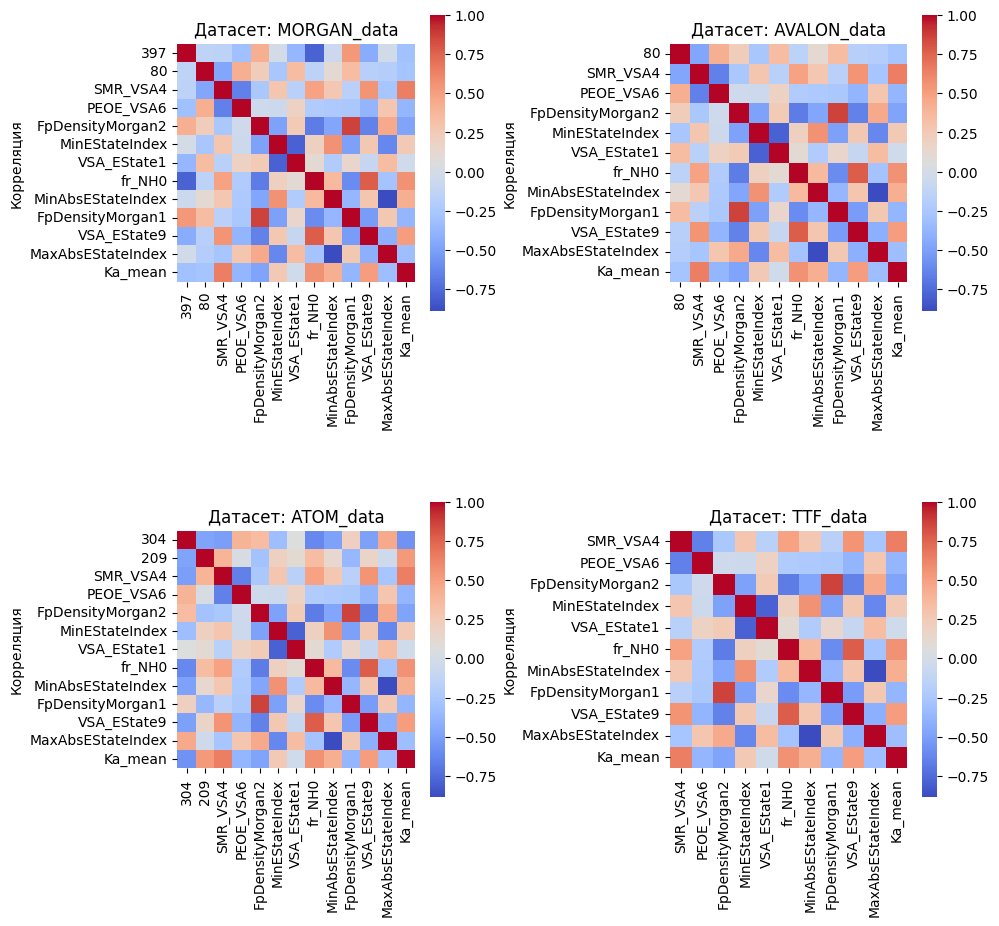

In [63]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('AVALON_data', AVALON_data),
    ('ATOM_data', ATOM_data),
    ('TTF_data', TTF_data)
]

plt.figure(figsize=(10, 10))  # Устанавливаем размер фигуры

for i, (name, df) in enumerate(datasets):
    # Вычисляем корреляцию
    correlation_matrix = df.corr()

    # Создаем подграфик
    plt.subplot(2, 2, i + 1)

    # Визуализация всей корреляционной матрицы
    sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title(f'Датасет: {name}')  # Заголовок с именем датасета
    plt.ylabel('Корреляция')  # Подпись оси y

plt.tight_layout()  # Подгоняем макет для лучшего отображения
plt.show()  # Показываем графики

Таким образом, самым коррелирующим с целевой метрикой оказался датасет ATOM_data. В будущем буду использовать его

In [68]:
ATOM_data.to_csv("AtomPairsData.csv")